In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import glob
import os

In [20]:
forecast_demand_file_path = '../data/forecastdemand_nsw.csv'
actual_demand_file_path = '../data/totaldemand_nsw.csv'
temperature_file_path = '../data/temperature_nsw.csv'
forecast_demand = pd.read_csv(forecast_demand_file_path)
actual_demand = pd.read_csv(actual_demand_file_path)
temperature = pd.read_csv(temperature_file_path)


In [3]:
forecast_demand.head()

,DATETIME,REGIONID,FORECASTDEMAND,PREDISPATCHSEQNO,PERIODID,LASTCHANGED
0,2010-01-01 00:00:00,NSW1,7832.04,2009123018,71,2009-12-30 12:31:49
1,2010-01-01 00:00:00,NSW1,7832.04,2009123019,70,2009-12-30 13:01:43
2,2010-01-01 00:00:00,NSW1,7832.03,2009123020,69,2009-12-30 13:31:36
3,2010-01-01 00:00:00,NSW1,7832.03,2009123021,68,2009-12-30 14:01:44
4,2010-01-01 00:00:00,NSW1,7830.96,2009123022,67,2009-12-30 14:31:35


In [4]:
actual_demand.head()
actual_demand.tail()

,DATETIME,REGIONID,TOTALDEMAND
1323393,2022-07-31 23:40:00,NSW1,8180.34
1323394,2022-07-31 23:45:00,NSW1,8237.50
1323395,2022-07-31 23:50:00,NSW1,8109.83
1323396,2022-07-31 23:55:00,NSW1,8044.52
1323397,2022-08-01 00:00:00,NSW1,8027.28


In [21]:
temperature.head()
temperature.tail()
temperature.loc[temperature['TEMPERATURE'] <= -5, 'TEMPERATURE'] = np.nan
temperature.min()

DATETIME       2010-01-01 00:00:00
LOCATION                   94766.0
TEMPERATURE                   -1.3
dtype: object

In [22]:
path = '../data/nswdemand2022onwards'
all_files = glob.glob(os.path.join(path, "*.csv"))

total_demand_2022onwards = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [17]:
total_demand_2022onwards.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,2022/01/01 00:05:00,7206.03,124.86,TRADE
1,NSW1,2022/01/01 00:10:00,7174.26,126.02,TRADE
2,NSW1,2022/01/01 00:15:00,7135.00,124.93,TRADE
3,NSW1,2022/01/01 00:20:00,7065.84,113.54,TRADE
4,NSW1,2022/01/01 00:25:00,6995.08,123.12,TRADE


In [23]:
df = pd.DataFrame({'Date Time': actual_demand['DATETIME'], 'Total Demand': actual_demand['TOTALDEMAND']})
df.head()

,Date Time,Total Demand
0,2010-01-01 00:00:00,7997.41
1,2010-01-01 00:05:00,7946.51
2,2010-01-01 00:10:00,7921.55
3,2010-01-01 00:15:00,7837.84
4,2010-01-01 00:20:00,7781.11


In [26]:
df = pd.merge(df,temperature,left_on=['Date Time'], right_on=['DATETIME'], how = 'left')
df=df.drop(columns=['DATETIME', 'LOCATION'])
df.head(15)

,Date Time,Total Demand,TEMPERATURE
0,2010-01-01 00:00:00,7997.41,23.1
1,2010-01-01 00:05:00,7946.51,NaN
2,2010-01-01 00:10:00,7921.55,NaN
3,2010-01-01 00:15:00,7837.84,NaN
4,2010-01-01 00:20:00,7781.11,NaN
5,2010-01-01 00:25:00,7685.53,NaN
6,2010-01-01 00:30:00,7683.34,22.9
7,2010-01-01 00:35:00,7624.60,NaN
8,2010-01-01 00:40:00,7606.74,NaN
9,2010-01-01 00:45:00,7555.47,NaN


In [25]:
df.dtypes

Date Time        object
Total Demand    float64
dtype: object

In [27]:
df['TEMPERATURE'] = df['TEMPERATURE'].interpolate(method='linear')

In [11]:
df.head(15)

,Date Time,Total Demand,TEMPERATURE
0,2010-01-01 00:00:00,7997.41,23.100000
1,2010-01-01 00:05:00,7946.51,23.066667
2,2010-01-01 00:10:00,7921.55,23.033333
3,2010-01-01 00:15:00,7837.84,23.000000
4,2010-01-01 00:20:00,7781.11,22.966667
5,2010-01-01 00:25:00,7685.53,22.933333
6,2010-01-01 00:30:00,7683.34,22.900000
7,2010-01-01 00:35:00,7624.60,22.850000
8,2010-01-01 00:40:00,7606.74,22.800000
9,2010-01-01 00:45:00,7555.47,22.750000


In [29]:
df['Date Time'] = pd.to_datetime(df['Date Time'])

<Axes: xlabel='Date Time'>

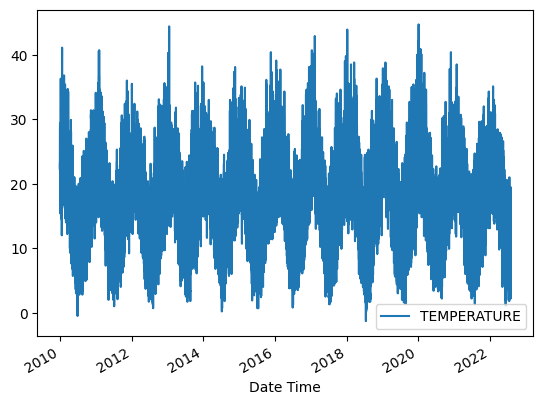

In [30]:
df.plot(x='Date Time' ,y= 'TEMPERATURE' )

<Axes: xlabel='Date Time'>

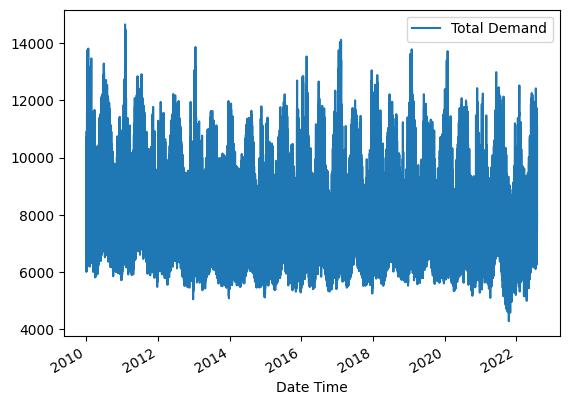

In [31]:
df.plot(x='Date Time', y = 'Total Demand')